# Tori Engler 
## Homework 2: Visualization Using Seaborn and Bokeh
### 10/3/19

In [177]:
from bokeh.plotting import figure
import numpy as np
import pandas as pd
from bokeh.layouts import layout
from bokeh.layouts import widgetbox
from bokeh.embed import file_html
from bokeh.io import show
from bokeh.io import output_notebook
from bokeh.models import Text
from bokeh.models import Plot
from bokeh.models import Slider
from bokeh.models import Circle
from bokeh.models import Range1d
from bokeh.models import CustomJS
from bokeh.models import HoverTool
from bokeh.models import LinearAxis
from bokeh.models import ColumnDataSource
from bokeh.models import SingleIntervalTicker

from bokeh.palettes import Spectral6
import seaborn as sns 

athletes=pd.read_csv('https://bit.ly/2lUIi5P')
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### My Questions
#### Question 1: I wonder which country sent the most females to the Olympics and in which year? How did that country's representation from women change over time?

In [192]:
girls= athletes[athletes['Sex']=='F'].set_index('ID')
girls.head(15)
G_count=girls.groupby(['Year','NOC'])['Name'].count().to_frame().reset_index()
G_counts_per_country= G_count.sort_values('Name', ascending=False)
G_counts_per_country.head()

,Year,NOC,Name
2454,2016,USA,369
1247,2000,AUS,368
962,1992,USA,367
1920,2008,USA,366
1175,1996,USA,361


In [197]:
US_data=G_counts_per_country[G_counts_per_country['NOC']=='USA']
US_data.head()

,Year,NOC,Name
2454,2016,USA,369
962,1992,USA,367
1920,2008,USA,366
1175,1996,USA,361
828,1988,USA,348


In [202]:
sns.relplot(x="Year", y="Name", kind="line", ci=None, data=US_data);

AttributeError: module 'seaborn' has no attribute 'relplot'

#### Question 3: Were there any countries that didn't participate in a significant amount of Olympic Games?


In [153]:
countries=athletes.groupby(['Year','NOC', 'Event'])['Name'].count()
countries=countries.to_frame().reset_index()
countries.sort_values('Year')
countries[countries['Year']==2012].head()
#countries[countries['NOC']]

,Year,NOC,Event,Name
98465,2012,AFG,Athletics Men's 100 metres,1
98466,2012,AFG,Athletics Women's 100 metres,1
98467,2012,AFG,Boxing Men's Flyweight,1
98468,2012,AFG,Judo Men's Half-Lightweight,1
98469,2012,AFG,Taekwondo Men's Featherweight,1


### Question *: I wonder if the number of countries that competed in the Olympics shifted over time? Which country went every year?

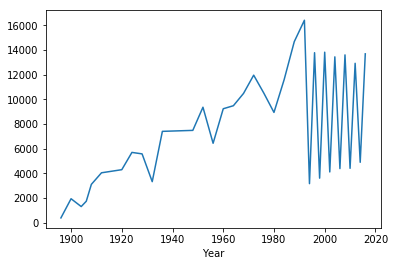

In [93]:
#of countries taht competed over time
count_time=athletes[['Year','NOC']]
counts=count_time.groupby('Year')['NOC'].count()
counts.plot()

#### Question 4: I wonder how the size of team for each country shifted over time. 



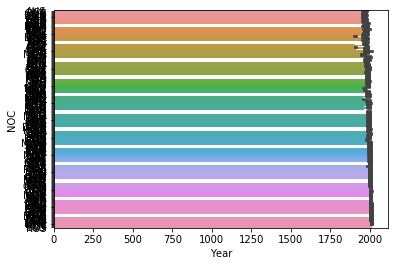

In [150]:
count_time=athletes[['Year','NOC', 'Name']]
counts_per_team=count_time.groupby(['Year','NOC'])['Name'].count().reset_index().fillna(0).sort_values('Year')
sns.barplot('Year', 'NOC', data=counts_per_team)

#### Question 5: I wonder if the average weight of female athletes varies greatly depending on their sports. 